In [165]:
import numpy as np
import matplotlib.pyplot as plt
import BstoK_ref_ff as BstoK
import h5py as h5
from tqdm import tqdm

In [184]:
f = h5.File(path+'BstoK_ref_ff_dat.hdf5', 'r')


In [185]:
dict(f)

{'Cp0': <HDF5 dataset "Cp0": shape (5, 5), type "<f8">,
 'c0': <HDF5 dataset "c0": shape (4,), type "<f8">,
 'cp': <HDF5 dataset "cp": shape (4,), type "<f8">}

In [182]:
nplus=3 # number of input values for f+
nzero=3
gp=f.get('BstoK_refdata_qsqmin_17.50_Np{:d}_Nz{:d}'.format(nplus,nzero))
dict(gp)

{'Eref': <HDF5 dataset "Eref": shape (6,), type "<f8">,
 'central': <HDF5 dataset "central": shape (6,), type "<f8">,
 'fit_cor': <HDF5 dataset "fit_cor": shape (6, 6), type "<f8">,
 'fit_cov': <HDF5 dataset "fit_cov": shape (6, 6), type "<f8">,
 'flat_cor': <HDF5 dataset "flat_cor": shape (6, 6), type "<f8">,
 'flat_cov': <HDF5 dataset "flat_cov": shape (6, 6), type "<f8">,
 'qsqref': <HDF5 dataset "qsqref": shape (6,), type "<f8">,
 'stat_cor': <HDF5 dataset "stat_cor": shape (6, 6), type "<f8">,
 'stat_cov': <HDF5 dataset "stat_cov": shape (6, 6), type "<f8">,
 'tot_cor': <HDF5 dataset "tot_cor": shape (6, 6), type "<f8">,
 'tot_cov': <HDF5 dataset "tot_cov": shape (6, 6), type "<f8">,
 'zref': <HDF5 dataset "zref": shape (6,), type "<f8">}

In [195]:
datasetisrome = True

nplus=3 # number of input values for f+
nzero=3 # number of input values for f0
path=''
with h5.File(path+'zfit_data_BstoK.h5', 'r') as f:
    gp=f.get('BstoK_refdata_qsqmin_17.50_Np{:d}_Nz{:d}'.format(nplus,nzero))
    qsqinputl=np.array(gp['qsqref'])
    bskpts=np.array(gp['central'])
    bskcov=np.array(gp['stat_cov'])#np.array(gp['tot_cov'])


chi0plus = 1.48e-02
chi1minus = 6.03e-04
chiplus = chi1minus
chizero = chi0plus

##### "Rome data" #####

romedata = np.array([[1.3461, 1.102, 0.911],
[1.6154, 1.208, 0.944],
[1.8846, 1.336, 0.979]]) #rome form factor data, plus = 1, zero = 2

romedataplus = np.array([[1.3461, 1.102],
[1.6154, 1.208],
[1.8846, 1.336]])

romedatazero = np.array([[1.3461, 0.911],
[1.6154, 0.944],
[1.8846, 0.979]])


######################################################################


tstar = 29.349571
t0 = 16.505107
tplus = 34.368484
tminus = 23.728356

dataplus=np.transpose(np.array([qsqinputl[0:nplus],
bskpts[0:nplus]]))

datazero=np.transpose(np.array([qsqinputl[nplus:],
bskpts[nplus:]]))

totaldata = [datazero,dataplus]
chizerovar = 0
chiplusvar = 0
eta = 1
covmatrix = bskcov
polevalszero = []
polevalsplus = [5.324700**2]

if datasetisrome:
    datazero = romedatazero
    dataplus = romedataplus
    totaldata = [datazero,dataplus]
    #chizerovar = 0.00133
    #chiplusvar = 0.00036
    tminus = 1.8846
    tplus = 5.588946789081293
    tstar = tplus
    t0 = tminus
    eta = 2
    nplus=3
    nzero=3
    polevalszero = [2.3178**2]
    polevalsplus = [2.1122**2]
    covmatrix = np.array([[0.0003728 , 0.00035185, 0.00032986, 0.00062943, 0.00068001,
        0.00074066],
       [0.00035185, 0.00035141, 0.00035093, 0.00059243, 0.00066987,
        0.0007647 ],
       [0.00032986, 0.00035093, 0.00037308, 0.00055355, 0.00065922,
        0.00078995],
       [0.00062943, 0.00059243, 0.00055355, 0.00143986, 0.00165246,
        0.00191377],
       [0.00068001, 0.00066987, 0.00065922, 0.00165246, 0.0019623 ,
        0.00234545],
       [0.00074066, 0.0007647 , 0.00078995, 0.00191377, 0.00234545,
        0.00288136]])
    bskpts = []
    for subdata in [dataplus,datazero]:
        for counter in range(3):
            bskpts.append(subdata[counter,1])
    

In [200]:
bskpts

[1.102, 1.208, 1.336, 0.911, 0.944, 0.979]

In [193]:
def covresample(bskpts):
    bskpts_resampled = np.random.multivariate_normal(bskpts,covmatrix)
    dataplustlist = []
    for i in range(len(dataplus)):
        dataplustlist.append(dataplus[i][0])
    
    plus = np.array([dataplustlist,
    bskpts_resampled[0:nplus]])
    plus=np.transpose(plus)

    datazerotlist = []
    for i in range(len(datazero)):
        datazerotlist.append(datazero[i][0])
    zero = np.array([datazerotlist,
    bskpts_resampled[nplus:]])
    zero=np.transpose(zero)
    return [zero,plus]

In [194]:
print(totaldata)
print(bskpts)
print(covresample(bskpts))

[array([[23.72835562,  0.87408119],
       [21.15623588,  0.67959348],
       [17.5       ,  0.48907235]]), array([[23.72835562,  3.16577058],
       [21.15623588,  1.82072549],
       [17.5       ,  0.98140563]])]
[3.16577058 1.82072549 0.98140563 0.87408119 0.67959348 0.48907235]
[array([[23.72835562,  0.89202796],
       [21.15623588,  0.69399648],
       [17.5       ,  0.49543943]]), array([[23.72835562,  3.22714367],
       [21.15623588,  1.87390658],
       [17.5       ,  1.02947484]])]


In [206]:
print(totaldata)
print(bskpts)
print(covresample(bskpts))

[array([[1.3461, 0.911 ],
       [1.6154, 0.944 ],
       [1.8846, 0.979 ]]), array([[1.3461, 1.102 ],
       [1.6154, 1.208 ],
       [1.8846, 1.336 ]])]
[1.102, 1.208, 1.336, 0.911, 0.944, 0.979]
[array([[1.3461    , 0.9400135 ],
       [1.6154    , 0.98074991],
       [1.8846    , 1.02536736]]), array([[1.3461    , 1.10128596],
       [1.6154    , 1.20585746],
       [1.8846    , 1.33212958]])]


In [56]:
def z(t):
    return (np.sqrt(tstar-t)-np.sqrt(tstar - t0))/(np.sqrt(tstar-t)+np.sqrt(tstar - t0))

In [57]:
def phiplus(t,chi = chiplus):
    #chi = 1
    K = 48*np.pi
    a = 3
    b = 2
    rq = np.sqrt(tstar-t)
    rminus = np.sqrt(tstar-tminus)
    r0 = np.sqrt(tstar-t0)
    val = np.sqrt(eta/(K*chi))*(rq**((a+1)/2))*r0**(-1/2)*(rq+r0)*((rq+np.sqrt(tstar))**(-b-3))*(rq+rminus)**(a/2)
    for i in range(len(polevalsplus)):
        val *= (z(t)-z(polevalsplus[i]))/(1-np.conjugate(z(polevalsplus[i]))*z(t))
    return val

In [58]:
def phizero(t,chi = chizero):
    #chi = 1
    K = 16*np.pi/(tplus*tminus)
    a = 1
    b = 1
    rq = np.sqrt(tstar-t)
    rminus = np.sqrt(tstar-tminus)
    r0 = np.sqrt(tstar-t0)
    val = np.sqrt(eta/(K*chi))*(rq**((a+1)/2))*r0**(-1/2)*(rq+r0)*((rq+np.sqrt(tstar))**(-b-3))*(rq+rminus)**(a/2)
    for i in range(len(polevalszero)):
        val *= (z(t)-z(polevalszero[i]))/(1-np.conjugate(z(polevalszero[i]))*z(t))
    return val

In [59]:
def exclude(G,a,b):
    return np.delete(np.delete(G,b,0),a,1)

In [60]:
def G(data,t):
    row = [t]
    row.extend(data[:,0])
    #print(row)
    mat = np.empty([data.shape[0]+1,data.shape[0]+1])

    for i in range(len(row)):
        for j in range(len(row)):
            mat[i,j] = 1/(1-z(row[i])*z(row[j]))
    return mat

In [61]:
def Gdiag(G):
    #print(G)
    tempresult = np.linalg.svd(G)
    D = np.diag(tempresult[1])
    U = np.transpose(np.array(tempresult[0]))
    return [D,U]

In [62]:
def alpha(data,t):
    ssum = 0
    temp = Gdiag(G(data,t))
    U = temp[1]
    D = temp[0]
    for i in range(0,data.shape[0]+1):
        ssum += U[i,0]*U[i,0]/D[i,i]
    return ssum

In [63]:
def beta(data, t, phi,chi):
    ssum = 0
    temp = Gdiag(G(data,t))
    U = temp[1]
    D = temp[0]
    for i in range(0,data.shape[0]+1):
        for j in range(1,data.shape[0]+1):
            ssum += U[i,j]*data[j-1,1]*phi(data[j-1,0],chi)*U[i,0]/D[i,i]
    return ssum

In [64]:
def gamma(data, t,phi,chi):
    temp = Gdiag(G(data,t))
    U = temp[1]
    D = temp[0]
    ssum = 1
    for i in range(0,data.shape[0]+1):
        for j in range(1,data.shape[0]+1):
            for k in range(1,data.shape[0]+1):
                ssum -= U[i,j]*data[j-1,1]*phi(data[j-1,0],chi)*U[i,k]*data[k-1,1]*phi(data[k-1,0],chi)/D[i,i]
    return ssum

In [65]:
def formfactor_unordered(data,t,chi=[chizero,chiplus]):
    results = []
    datazero = data[0]
    dataplus = data[1]
    chizero = chi[0]
    chiplus = chi[1]
    
    
    for dindex in [0,1]:
        ssum = 0
        tempdata = data[dindex]
        phi = [phizero,phiplus][dindex]
        
        
        calcalpha = alpha(tempdata,t)
        #print(tempdata,t,phi,chi[dindex])
        calcbeta = beta(tempdata,t,phi,chi[dindex])
        calcgamma = gamma(tempdata,t,phi,chi[dindex])
        #print(calcalpha,calcbeta,calcgamma)
        [D,U] = Gdiag(G(tempdata,t))
        #print(D,U)
        phif = tempdata[:,1]*phi(tempdata[:,0])
        for i in range(0,tempdata.shape[0]):
            for j in range(i+1,tempdata.shape[0]+1):
                for k in range(1,tempdata.shape[0]+1):
                    #print(U.shape,phif.shape)
                    C1 = 2*U[i,0]*U[i,k]*U[j,0]*U[j,1:]
                    C2 = U[i,0]*U[i,0]*U[j,k]*U[j,1:]
                    C3 = U[j,0]*U[j,0]*U[i,k]*U[i,1:]
                    ssum += phif[:]*phif[k-1]*(C1 - C2 - C3)/(D[i,i]*D[j,j]) # add to list and sort
        discrim = sum(ssum) + calcalpha
        if discrim < 0:
            print("discriminant is negative: ",discrim,calcbeta**2+calcalpha*calcgamma)
            discrim = 0
        lowerbound = (-calcbeta-np.sqrt(discrim))/(calcalpha*phi(t))
        upperbound = (-calcbeta+np.sqrt(discrim))/(calcalpha*phi(t))
        results.append([lowerbound,upperbound])
    return results

In [66]:
def sort_list(numlist):
    return np.flip(sorted(numlist, key = abs))

In [97]:
def formfactor(data,t,chi=[chizero,chiplus]):
    results = []
    datazero = data[0]
    dataplus = data[1]
    chizero = chi[0]
    chiplus = chi[1]
    
    
    for dindex in [0,1]:
        ssum = []
        tempdata = data[dindex]
        phi = [phizero,phiplus][dindex]
        
        
        calcalpha = alpha(tempdata,t)
        #print(tempdata,t,phi,chi[dindex])
        calcbeta = beta(tempdata,t,phi,chi[dindex])
        calcgamma = gamma(tempdata,t,phi,chi[dindex])
        #print(calcalpha,calcbeta,calcgamma)
        [D,U] = Gdiag(G(tempdata,t))
        #print(D,U)
        phif = tempdata[:,1]*phi(tempdata[:,0])
        for i in range(0,tempdata.shape[0]):
            for j in range(i+1,tempdata.shape[0]+1):
                for k in range(1,tempdata.shape[0]+1):
                    for l in range(1,tempdata.shape[0]+1):
                        #print(U.shape,phif.shape)
                        C1 = 2*U[i,0]*U[i,k]*U[j,0]*U[j,l]
                        C2 = U[i,0]*U[i,0]*U[j,k]*U[j,l]
                        C3 = U[j,0]*U[j,0]*U[i,k]*U[i,l]
                        ssum.append(phif[l-1]*phif[k-1]*(C1 - C2 - C3)/(D[i,i]*D[j,j]))  # add to list and sort
        summand = sort_list(ssum)
        discrim = 0
        for i in range(len(ssum)):
            discrim += summand[i]
        discrim += calcalpha
        if discrim < 0:
            print("discriminant is negative: ",discrim,calcbeta**2+calcalpha*calcgamma)
            discrim = 0
        lowerbound = (-calcbeta-np.sqrt(discrim))/(calcalpha*phi(t))
        upperbound = (-calcbeta+np.sqrt(discrim))/(calcalpha*phi(t))
        results.append([lowerbound,upperbound])
    return results

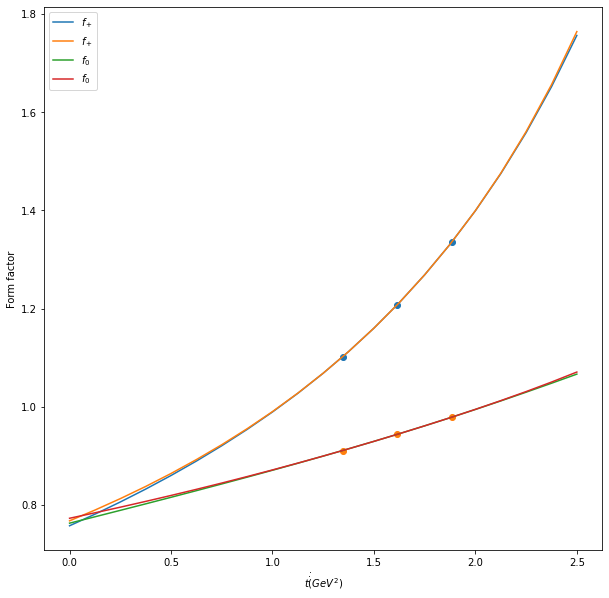

In [201]:
x = np.linspace(0,2.5,21)
plt.plot(x,[formfactor(totaldata,i)[1] for i in x],label = r"$f_+$")
plt.plot(x,[formfactor(totaldata,i)[0] for i in x],label = r"$f_0$")
plt.scatter(dataplus[:,0],dataplus[:,1])
plt.scatter(datazero[:,0],datazero[:,1])

plt.xlabel(r"$t \.\.(GeV^2)$")
plt.ylabel("Form factor")
plt.legend()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [147]:
def dispbounds(tlist,Nboot,N0=10,keepallindexresults=False,seed=None):
    np.random.seed(seed=seed)
    if N0 < 2:
        print("N0 must have a value of at least 2")
        return
    nooverlapcount = 0
    unitarityfailcount = 0
    totalresults = []
    for i in tqdm(range(Nboot)):
        #print(bskpts)
        resampleddata = covresample(bskpts)
        #print(resampleddata)
        resampledchi = [np.random.normal(chizero,0),np.random.normal(chiplus,0)]#chizerovar,chiplusvar
        #print("about to resample zero bounds")
        resamplezerobounds = formfactor(resampleddata,0,resampledchi)
        #print("finished resampling zero bounds")
        if resamplezerobounds[0][0]>resamplezerobounds[1][1] or resamplezerobounds[0][1]<resamplezerobounds[1][0]:
            nooverlapcount += 1
            continue
        elif resamplezerobounds[0][0]==resamplezerobounds[0][1] or resamplezerobounds[1][0]==resamplezerobounds[1][1]:
            unitarityfailcount += 1
            continue
        lower = max(resamplezerobounds[0][0],resamplezerobounds[1][0])
        upper = min(resamplezerobounds[0][1],resamplezerobounds[1][1])
        
        indexlist = np.linspace(0,N0-1,N0,dtype=int)#index can take values from 0 to N0-1
        #print(indexlist)
        tempboundslist = np.zeros([len(tlist),len(indexlist)],dtype=object)
        for index in indexlist:
            fval = lower+(upper-lower)*index/(N0-1)
            erdata = [0,0]
            #print(resampleddata[0],resampleddata[1])
            erdata[0] = np.vstack([resampleddata[0],[0,fval]])
            erdata[1] = np.vstack([resampleddata[1],[0,fval]])
            counter = 0
            
            for t in tlist:
                tempbounds = formfactor(erdata,t,resampledchi)
                #print(tempbounds)
                #print("Hello")
                tempboundslist[counter,index] = tempbounds
                counter += 1
        #print(tempboundslist)
        if keepallindexresults==False:
            results = np.zeros([len(tlist)],dtype=object)
            for tindex in range(len(tlist)):
                #print(tindex)
                results[tindex] = tempboundslist[tindex,0]
                for index in range(1,len(indexlist)):
                    a = results[tindex]
                    b = tempboundslist[tindex,index]
                    results[tindex] = [[min(a[0][0],b[0][0]),max(a[0][1],b[0][1])],[min(a[1][0],b[1][0]),max(a[1][1],b[1][1])]]
        elif keepallindexresults==True:
            results = tempboundslist #results structured as results[index][timeindex][f0/f+][lower/upper]
        
        totalresults.append(results)#results structured as results[Nboot][index][timeindex][f0/f+][lower/upper]
    if nooverlapcount + unitarityfailcount > 0:
        print(nooverlapcount,unitarityfailcount)
    return [tlist,totalresults,Nboot]

In [70]:
#calculating final values from bootstrap results
def calcbounds(output):
    results = np.zeros([len(output[0]),2],dtype=object)
    for tindex in range(len(output[0])):
        tempresult=[]
        for dindex in [0,1]:
            tchosen = output[0][tindex]
            data = np.zeros([output[2],2])
            for boot in range(output[2]):
                data[boot,0] = output[1][boot][tindex][dindex][0]
                data[boot,1] = output[1][boot][tindex][dindex][1]
            #print(data)
            averageff = (0.5*(np.nanmean(data[:,0])+np.nanmean(data[:,1])))
            delta = [data[:,0]-averageff,data[:,1]-averageff]
            varlo = np.sum(delta[0]**2)/(len(delta[0])-1)
            varup = np.sum(delta[1]**2)/(len(delta[1])-1)
            rho = np.dot(delta[0],delta[1])/(len(delta[0])-1)
            var = (np.nanmean(data[:,0])-np.nanmean(data[:,1]))**2/12 + (varlo+varup+rho)/3
            std = np.sqrt(var)
            tempresult.append([averageff,std])
        results[tindex,0] = output[0][tindex]
        results[tindex,1] = tempresult
    
    tvals = np.zeros([len(results[:,0])])
    f0vals = np.zeros([len(results[:,0])])
    f0vars = np.zeros([len(results[:,0])])
    fplusvals = np.zeros([len(results[:,0])])
    fplusvars = np.zeros([len(results[:,0])])
    for tindex in range(len(results[:,0])):
        tvals[tindex] = results[tindex,0]
        f0vals[tindex] = results[:,1][tindex][0][0]
        f0vars[tindex] = results[:,1][tindex][0][1]
        fplusvals[tindex] = results[:,1][tindex][1][0]
        fplusvars[tindex] = results[:,1][tindex][1][1]
    return [tvals,f0vals,f0vars,fplusvals,fplusvars]

In [196]:
#investigating index
np.random.seed(seed=1)
NBoot = 1
N0 = 1000
tlist = [1]
output = dispbounds(tlist,NBoot,N0=N0,keepallindexresults=True)#,seed=2


100%|██████████| 1/1 [00:14<00:00, 14.54s/it]


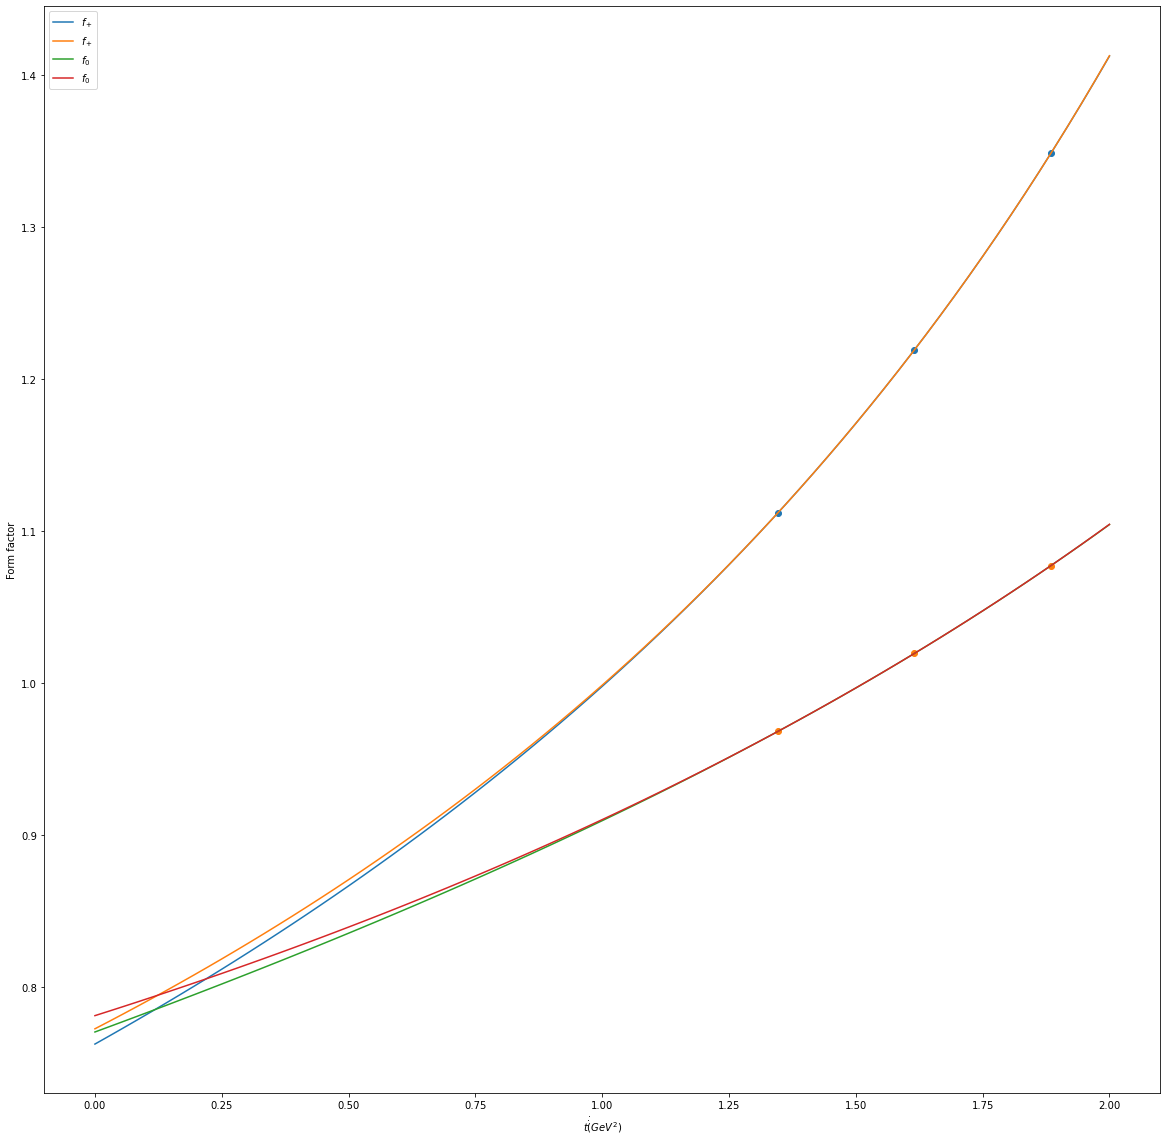

In [207]:
x = np.linspace(0,2,73)
resampleddata = covresample(bskpts)
plt.plot(x,[formfactor(resampleddata,i)[1] for i in x],label = r"$f_+$")
plt.plot(x,[formfactor(resampleddata,i)[0] for i in x],label = r"$f_0$")
plt.scatter(resampleddata[1][:,0],resampleddata[1][:,1])
plt.scatter(resampleddata[0][:,0],resampleddata[0][:,1])

plt.xlabel(r"$t \.\.(GeV^2)$")
plt.ylabel("Form factor")
plt.legend()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [197]:
output

[[1],
 [array([[list([[0.9222175118438635, 0.9222175220665034], [1.0163436057988056, 1.0163826086466095]]),
          list([[0.9222171334896732, 0.9222186659735767], [1.0163440611267878, 1.0163830706342485]]),
          list([[0.9222171992191086, 0.9222193657970251], [1.0163445164815657, 1.016383532595091]]),
          list([[0.9222173389397633, 0.9222199916292532], [1.0163449718631252, 1.0163839945291522]]),
          list([[0.9222175169981854, 0.9222205791237139], [1.0163454272714476, 1.016384456436451]]),
          list([[0.9222177195795233, 0.922221142095259], [1.0163458827065235, 1.0163849183169953]]),
          list([[0.9222179395965135, 0.9222216876311525], [1.016346338168342, 1.016385380170798]]),
          list([[0.9222181728374576, 0.9222222199430915], [1.0163467936568762, 1.0163858419978837]]),
          list([[0.9222184165575861, 0.922222741775846], [1.0163472491721368, 1.0163863037982444]]),
          list([[0.9222186688496351, 0.9222232550366797], [1.0163477047140923, 1.0

No handles with labels found to put in legend.


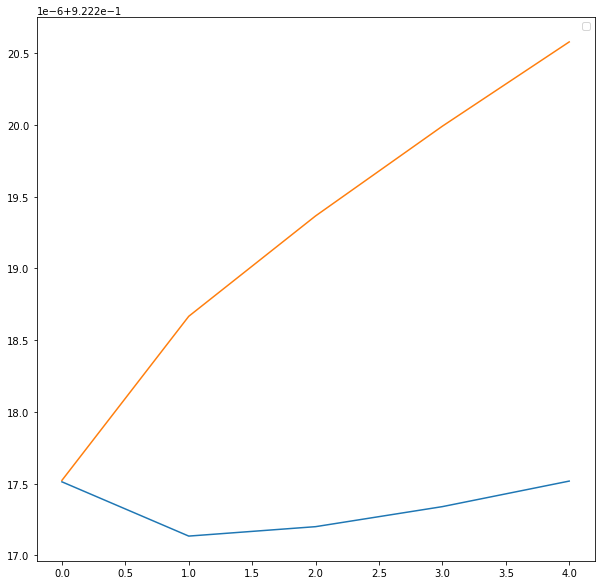

In [199]:
fftoplot = 0 #0=f0, 1 = f+
N0plotrange = range(5)#range(N0)
for t in range(len(tlist)):
    for x in range(NBoot):
        for bound in [0,1]:
            plt.plot(N0plotrange,[output[1][x][t][i][fftoplot][bound] for i in N0plotrange])#,label=str(t)/output[1][x][t][0][fftoplot][bound]

#plt.xlabel(r"$t \.\.(GeV^2)$")
#plt.ylabel("Form factor")
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

No handles with labels found to put in legend.


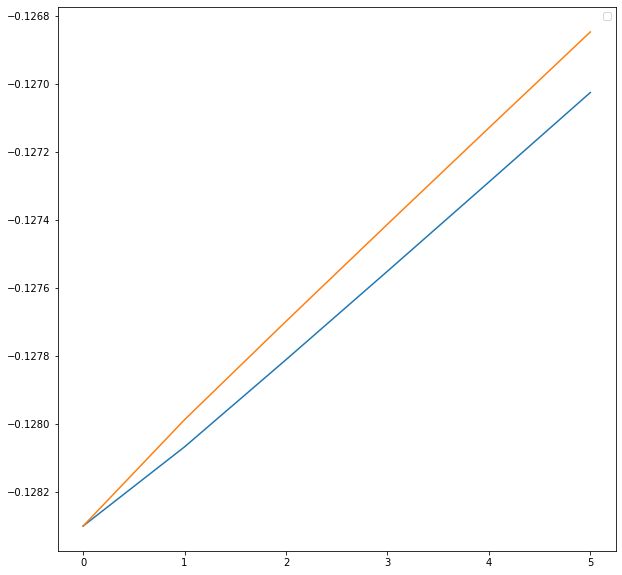

In [24]:
for t in range(len(tlist)):
    for x in range(NBoot):
        for bound in [0,1]:
            plt.plot(range(6),[output[1][x][t][i][fftoplot][bound] for i in range(6)])#,label=str(t)/output[1][x][t][99][fftoplot][bound]

#plt.xlabel(r"$t \.\.(GeV^2)$")
#plt.ylabel("Form factor")
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [208]:
timelist = np.linspace(0,2,51)#[17.5,21.15623588,23.72835562]
NBootstraps = 100
output = dispbounds(timelist,NBootstraps,N0=10)


  0%|          | 0/100 [00:00<?, ?it/s]

discriminant is negative:  -26298.79376220703 -131072.0
discriminant is negative:  -11983.272521972656 -32768.0
discriminant is negative:  -4232.866859436035 57344.0
discriminant is negative:  -4130.572128295898 -28672.0
discriminant is negative:  -48.301727294921875 22528.0
discriminant is negative:  -3442.3575286865234 24576.0
discriminant is negative:  -1365.049690246582 0.0
discriminant is negative:  -6.1823883056640625 -28672.0
discriminant is negative:  -7633.3887939453125 -524288.0
discriminant is negative:  -15249.607360839844 -4456448.0
discriminant is negative:  -20038.17041015625 2097152.0
discriminant is negative:  -101379.61645507812 6291456.0
discriminant is negative:  -300769.5988769531 -75497472.0
discriminant is negative:  -1659484.96875 51539607552.0
discriminant is negative:  -894554.4453125 17179869184.0
discriminant is negative:  -7031840.59375 -103079215104.0
discriminant is negative:  -34692616.25 -2199023255552.0
discriminant is negative:  -450376.6015625 -10737

  2%|▏         | 2/100 [00:07<06:12,  3.80s/it]

discriminant is negative:  -607870.46875 1073741824.0
discriminant is negative:  -1384897.08203125 -2147483648.0
discriminant is negative:  -282272150.0 0.0
discriminant is negative:  -31784.312744140625 262144.0
discriminant is negative:  -13868.073944091797 -49152.0
discriminant is negative:  -5150.676834106445 -36864.0
discriminant is negative:  -4974.991790771484 43008.0
discriminant is negative:  -260.38915252685547 -32768.0
discriminant is negative:  -4189.513641357422 26624.0
discriminant is negative:  -1610.6018524169922 -6144.0
discriminant is negative:  -64.27105712890625 47104.0
discriminant is negative:  -10014.212310791016 131072.0
discriminant is negative:  -18350.46759033203 1835008.0
discriminant is negative:  -26713.370727539062 -2621440.0
discriminant is negative:  -115676.60485839844 13631488.0
discriminant is negative:  -342365.81787109375 0.0
discriminant is negative:  -1970990.734375 -34359738368.0
discriminant is negative:  -1361990.8203125 -12884901888.0
discrim

  3%|▎         | 3/100 [00:15<08:00,  4.95s/it]

discriminant is negative:  -16556.737670898438 -1835008.0
discriminant is negative:  -26190.969482421875 2621440.0
discriminant is negative:  -108563.68884277344 10485760.0
discriminant is negative:  -325769.69677734375 -33554432.0
discriminant is negative:  -2335806.21875 -17179869184.0
discriminant is negative:  -1364615.765625 4294967296.0
discriminant is negative:  -8079539.375 0.0
discriminant is negative:  -41549224.875 549755813888.0
discriminant is negative:  -563940.55859375 4294967296.0
discriminant is negative:  -1212375.5234375 3221225472.0
discriminant is negative:  -77432.984375 0.0
discriminant is negative:  -300414160.0 -211106232532992.0
discriminant is negative:  -28539.79345703125 65536.0
discriminant is negative:  -12434.721740722656 -16384.0
discriminant is negative:  -4545.107841491699 8192.0
discriminant is negative:  -4590.447326660156 -49152.0
discriminant is negative:  -296.31104278564453 -38912.0
discriminant is negative:  -3619.159896850586 14336.0
discrimin

  4%|▍         | 4/100 [00:23<09:18,  5.82s/it]

discriminant is negative:  -385824.6174316406 -8388608.0
discriminant is negative:  -2248378.0625 17179869184.0
discriminant is negative:  -1567053.171875 17179869184.0
discriminant is negative:  -9950777.4375 -68719476736.0
discriminant is negative:  -46606540.25 -549755813888.0
discriminant is negative:  -769107.3359375 -2147483648.0
discriminant is negative:  -1346249.83984375 -4294967296.0
discriminant is negative:  -313359913.0 0.0
discriminant is negative:  -23121.204223632812 -458752.0
discriminant is negative:  -10201.912109375 -49152.0
discriminant is negative:  -3797.4659271240234 -40960.0
discriminant is negative:  -3846.683036804199 -10240.0
discriminant is negative:  -6.8563690185546875 -45056.0
discriminant is negative:  -3057.254981994629 -22528.0
discriminant is negative:  -1275.069076538086 0.0
discriminant is negative:  -32.15863800048828 -12288.0
discriminant is negative:  -7043.2972412109375 -589824.0
discriminant is negative:  -11958.051696777344 -2097152.0
discrim

  5%|▌         | 5/100 [00:30<10:07,  6.40s/it]

discriminant is negative:  -10595.73959350586 0.0
discriminant is negative:  -18305.45849609375 3145728.0
discriminant is negative:  -27317.56396484375 -1048576.0
discriminant is negative:  -124745.41735839844 -7340032.0
discriminant is negative:  -373295.9602050781 -4194304.0
discriminant is negative:  -2125622.578125 -34359738368.0
discriminant is negative:  -1424014.6328125 0.0
discriminant is negative:  -8844553.625 0.0
discriminant is negative:  -46003715.25 1649267441664.0
discriminant is negative:  -690854.74609375 -2147483648.0
discriminant is negative:  -1350180.0 -2147483648.0
discriminant is negative:  -320032313.0 70368744177664.0
discriminant is negative:  -30336.496215820312 327680.0
discriminant is negative:  -13447.300079345703 32768.0
discriminant is negative:  -4417.356994628906 -8192.0
discriminant is negative:  -4732.658432006836 28672.0
discriminant is negative:  -50.35967254638672 45056.0
discriminant is negative:  -3860.816093444824 8192.0
discriminant is negativ

  6%|▌         | 6/100 [00:38<10:40,  6.81s/it]

discriminant is negative:  -10528.64224243164 -196608.0
discriminant is negative:  -17304.079650878906 -1572864.0
discriminant is negative:  -27810.268310546875 0.0
discriminant is negative:  -122671.98754882812 -6291456.0
discriminant is negative:  -369157.4709472656 0.0
discriminant is negative:  -1598109.21875 34359738368.0
discriminant is negative:  -1328610.046875 12884901888.0
discriminant is negative:  -8639627.4375 -34359738368.0
discriminant is negative:  -43120687.375 2199023255552.0
discriminant is negative:  -574306.01171875 2147483648.0
discriminant is negative:  -1192923.6015625 3221225472.0
discriminant is negative:  -321667085.0 -70368744177664.0
discriminant is negative:  -33766.75524902344 -65536.0
discriminant is negative:  -14908.999542236328 49152.0
discriminant is negative:  -5051.537506103516 -20480.0
discriminant is negative:  -5237.726860046387 0.0
discriminant is negative:  -149.16271209716797 -22528.0
discriminant is negative:  -4314.578308105469 6144.0
discr

  7%|▋         | 7/100 [00:46<11:06,  7.17s/it]


discriminant is negative:  -8953608.40625 -68719476736.0
discriminant is negative:  -46927970.125 1099511627776.0
discriminant is negative:  -711252.87109375 -2147483648.0
discriminant is negative:  -1271631.9453125 -1073741824.0
discriminant is negative:  -55554.9609375 17179869184.0
discriminant is negative:  -315355113.0 70368744177664.0
discriminant is negative:  -26804.249267578125 262144.0
discriminant is negative:  -11052.89193725586 114688.0
discriminant is negative:  -3892.017349243164 -12288.0
discriminant is negative:  -4062.1700286865234 -24576.0
discriminant is negative:  -130.23380279541016 65536.0
discriminant is negative:  -3302.0444412231445 -24576.0
discriminant is negative:  -1284.622703552246 75776.0
discriminant is negative:  -216.03717041015625 -75776.0
discriminant is negative:  -7966.379821777344 -458752.0
discriminant is negative:  -14572.218872070312 -262144.0
discriminant is negative:  -21750.36083984375 -4718592.0
discriminant is negative:  -94967.650634765

  8%|▊         | 8/100 [00:54<11:19,  7.39s/it]

discriminant is negative:  -9333295.5 -34359738368.0
discriminant is negative:  -45277561.625 549755813888.0
discriminant is negative:  -495367.609375 -1073741824.0
discriminant is negative:  -1245827.80078125 -1073741824.0
discriminant is negative:  -318712556.0 -70368744177664.0
discriminant is negative:  -25425.230224609375 196608.0
discriminant is negative:  -11117.476318359375 -32768.0
discriminant is negative:  -3631.961540222168 -4096.0
discriminant is negative:  -4112.961196899414 -28672.0
discriminant is negative:  -3342.495132446289 -12288.0
discriminant is negative:  -1139.4980239868164 -20480.0
discriminant is negative:  -7686.370361328125 131072.0
discriminant is negative:  -11814.468688964844 -2097152.0
discriminant is negative:  -20604.234008789062 1572864.0
discriminant is negative:  -91678.58142089844 2097152.0
discriminant is negative:  -281770.1589355469 0.0
discriminant is negative:  -1275482.15625 17179869184.0
discriminant is negative:  -905848.546875 -12884901888

 10%|█         | 10/100 [01:02<09:30,  6.34s/it]

discriminant is negative:  -2266963.21875 51539607552.0
discriminant is negative:  -1319027.25 4294967296.0
discriminant is negative:  -8228088.65625 34359738368.0
discriminant is negative:  -46078035.25 2199023255552.0
discriminant is negative:  -594815.1875 -3221225472.0
discriminant is negative:  -1233200.9765625 1073741824.0
discriminant is negative:  -290526887.0 0.0
discriminant is negative:  -19722.256469726562 -131072.0
discriminant is negative:  -7762.424957275391 49152.0
discriminant is negative:  -2650.7287216186523 -8192.0
discriminant is negative:  -2747.4390869140625 -16384.0
discriminant is negative:  -2.9541244506835938 -40960.0
discriminant is negative:  -2413.803886413574 -28672.0
discriminant is negative:  -939.8838119506836 -28672.0
discriminant is negative:  -149.08667755126953 16384.0
discriminant is negative:  -5426.3651123046875 -851968.0
discriminant is negative:  -8894.361511230469 786432.0
discriminant is negative:  -14500.655395507812 3145728.0
discriminant 

 11%|█         | 11/100 [01:10<10:09,  6.85s/it]

discriminant is negative:  -905524.25 12884901888.0
discriminant is negative:  -5637482.8125 -68719476736.0
discriminant is negative:  -30716752.875 2199023255552.0
discriminant is negative:  -342624.015625 1073741824.0
discriminant is negative:  -924137.5234375 0.0
discriminant is negative:  -210220067.0 -70368744177664.0
discriminant is negative:  -32473.08856201172 327680.0
discriminant is negative:  -14870.779876708984 114688.0
discriminant is negative:  -5236.787544250488 -40960.0
discriminant is negative:  -5204.332344055176 69632.0
discriminant is negative:  -199.36235809326172 -38912.0
discriminant is negative:  -4294.309532165527 -22528.0
discriminant is negative:  -1688.9438095092773 28672.0
discriminant is negative:  -174.78292846679688 43008.0
discriminant is negative:  -10133.044891357422 -131072.0
discriminant is negative:  -17611.001525878906 -1310720.0
discriminant is negative:  -25676.552368164062 1572864.0
discriminant is negative:  -120727.59045410156 -2097152.0
disc

 12%|█▏        | 12/100 [01:18<10:47,  7.35s/it]

discriminant is negative:  -641466.37890625 -1073741824.0
discriminant is negative:  -1273224.8671875 -1073741824.0
discriminant is negative:  -309521789.0 140737488355328.0
discriminant is negative:  -23208.33673095703 -131072.0
discriminant is negative:  -10451.788116455078 -49152.0
discriminant is negative:  -3793.138038635254 -32768.0
discriminant is negative:  -3785.024642944336 4096.0
discriminant is negative:  -122.84366607666016 -30720.0
discriminant is negative:  -3135.9608612060547 -34816.0
discriminant is negative:  -1366.9203262329102 43008.0
discriminant is negative:  -180.6491241455078 53248.0
discriminant is negative:  -7858.786529541016 -1572864.0
discriminant is negative:  -12634.772399902344 -1835008.0
discriminant is negative:  -20509.863891601562 3145728.0
discriminant is negative:  -90666.78247070312 -10485760.0
discriminant is negative:  -269942.8034667969 16777216.0
discriminant is negative:  -1563763.65625 34359738368.0
discriminant is negative:  -808329.3359375

 13%|█▎        | 13/100 [01:27<11:00,  7.59s/it]

discriminant is negative:  -275.78668212890625 -36864.0
discriminant is negative:  -11448.33316040039 -327680.0
discriminant is negative:  -18609.366760253906 -1310720.0
discriminant is negative:  -28592.358642578125 1048576.0
discriminant is negative:  -134791.09399414062 2097152.0
discriminant is negative:  -391059.1481933594 20971520.0
discriminant is negative:  -1969930.59375 -34359738368.0
discriminant is negative:  -1292480.9375 8589934592.0
discriminant is negative:  -9042234.65625 0.0
discriminant is negative:  -47840590.5 -2199023255552.0
discriminant is negative:  -670174.90234375 -1073741824.0
discriminant is negative:  -1366037.76171875 0.0
discriminant is negative:  -72015.3671875 12884901888.0
discriminant is negative:  -317253376.0 -70368744177664.0
discriminant is negative:  -32487.694763183594 -131072.0
discriminant is negative:  -14467.500213623047 -131072.0
discriminant is negative:  -5073.9665603637695 -40960.0
discriminant is negative:  -5240.457901000977 12288.0
d

 14%|█▍        | 14/100 [01:35<11:04,  7.72s/it]

discriminant is negative:  -10958.014465332031 1310720.0
discriminant is negative:  -15428.607543945312 1048576.0
discriminant is negative:  -69149.60559082031 2097152.0
discriminant is negative:  -198071.85546875 -8388608.0
discriminant is negative:  -1420722.265625 -34359738368.0
discriminant is negative:  -1003990.90625 8589934592.0
discriminant is negative:  -4588668.3125 -34359738368.0
discriminant is negative:  -24825412.0 -2199023255552.0
discriminant is negative:  -340731.1875 0.0
discriminant is negative:  -710216.17578125 -1073741824.0
discriminant is negative:  -82485.21875 4294967296.0
discriminant is negative:  -181161392.0 -70368744177664.0
discriminant is negative:  -23506.797241210938 0.0
discriminant is negative:  -10580.667877197266 -49152.0
discriminant is negative:  -3894.517562866211 -12288.0
discriminant is negative:  -3780.298873901367 -38912.0
discriminant is negative:  -18.40064239501953 -45056.0
discriminant is negative:  -3158.3410034179688 -14336.0
discrimin

 16%|█▌        | 16/100 [01:43<09:17,  6.64s/it]

discriminant is negative:  -1065355.875 12884901888.0
discriminant is negative:  -8008150.84375 -103079215104.0
discriminant is negative:  -39812519.125 549755813888.0
discriminant is negative:  -465941.015625 2147483648.0
discriminant is negative:  -1164858.06640625 0.0
discriminant is negative:  -286469125.0 140737488355328.0
discriminant is negative:  -21564.90802001953 -131072.0
discriminant is negative:  -9148.585479736328 -32768.0
discriminant is negative:  -3170.367202758789 -20480.0
discriminant is negative:  -3376.4611206054688 4096.0
discriminant is negative:  -44.00718688964844 6144.0
discriminant is negative:  -2889.3783111572266 10240.0
discriminant is negative:  -1047.8111419677734 -53248.0
discriminant is negative:  -287.47728729248047 0.0
discriminant is negative:  -7396.942138671875 -196608.0
discriminant is negative:  -12057.641479492188 2359296.0
discriminant is negative:  -19540.767700195312 -524288.0
discriminant is negative:  -82325.70666503906 -8388608.0
discrimi

 17%|█▋        | 17/100 [01:51<09:52,  7.14s/it]

discriminant is negative:  -1262751.78125 21474836480.0
discriminant is negative:  -10096220.53125 -103079215104.0
discriminant is negative:  -44261739.125 -2199023255552.0
discriminant is negative:  -639264.1640625 -1073741824.0
discriminant is negative:  -1355461.30078125 2147483648.0
discriminant is negative:  -320788392.0 140737488355328.0
discriminant is negative:  -17716894.0 -17592186044416.0
discriminant is negative:  -10652.985778808594 -262144.0
discriminant is negative:  -4271.679016113281 65536.0
discriminant is negative:  -1604.3995208740234 -53248.0
discriminant is negative:  -1555.0773010253906 -8192.0
discriminant is negative:  -88.43572998046875 -45056.0
discriminant is negative:  -1242.0750579833984 12288.0
discriminant is negative:  -457.54320526123047 22528.0
discriminant is negative:  -27.533538818359375 -51200.0
discriminant is negative:  -3452.595001220703 393216.0
discriminant is negative:  -5636.214599609375 -262144.0
discriminant is negative:  -8879.6195068359

 18%|█▊        | 18/100 [02:00<10:17,  7.53s/it]

discriminant is negative:  -382734.91015625 -1073741824.0
discriminant is negative:  -515029.875 -1073741824.0
discriminant is negative:  -129844997.0 -140737488355328.0
discriminant is negative:  -28948.049865722656 0.0
discriminant is negative:  -13196.410552978516 -16384.0
discriminant is negative:  -4419.6694412231445 24576.0
discriminant is negative:  -4499.78466796875 -28672.0
discriminant is negative:  -138.30620574951172 40960.0
discriminant is negative:  -3839.012306213379 -45056.0
discriminant is negative:  -1531.091697692871 -22528.0
discriminant is negative:  -8708.666900634766 327680.0
discriminant is negative:  -15397.276611328125 262144.0
discriminant is negative:  -20690.351806640625 0.0
discriminant is negative:  -109427.94580078125 9437184.0
discriminant is negative:  -321028.2082519531 29360128.0
discriminant is negative:  -1442996.375 0.0
discriminant is negative:  -897544.2890625 8589934592.0
discriminant is negative:  -7212206.21875 34359738368.0
discriminant is n

 19%|█▉        | 19/100 [02:08<10:25,  7.72s/it]

discriminant is negative:  -1674405.765625 17179869184.0
discriminant is negative:  -1430414.0703125 8589934592.0
discriminant is negative:  -8507243.40625 0.0
discriminant is negative:  -48168251.5 549755813888.0
discriminant is negative:  -695701.9375 -1073741824.0
discriminant is negative:  -1297573.28125 -1073741824.0
discriminant is negative:  -35121.3984375 4294967296.0
discriminant is negative:  -300664595.0 281474976710656.0
discriminant is negative:  -20146.785522460938 -196608.0
discriminant is negative:  -8741.540985107422 65536.0
discriminant is negative:  -2792.1310501098633 -8192.0
discriminant is negative:  -2924.018096923828 -32768.0
discriminant is negative:  -2513.886688232422 14336.0
discriminant is negative:  -1037.5960006713867 12288.0
discriminant is negative:  -5219.479431152344 0.0
discriminant is negative:  -8419.543762207031 -1310720.0
discriminant is negative:  -13696.409912109375 -1048576.0
discriminant is negative:  -71490.60437011719 -8388608.0
discriminan

 21%|██        | 21/100 [02:16<08:42,  6.62s/it]

 -764712.484375 -2147483648.0
discriminant is negative:  -1356471.4375 0.0
discriminant is negative:  -10725.4375 4294967296.0
discriminant is negative:  -326008262.0 -211106232532992.0
discriminant is negative:  -33243.40344238281 65536.0
discriminant is negative:  -14910.881469726562 -229376.0
discriminant is negative:  -5129.521919250488 -36864.0
discriminant is negative:  -5255.837287902832 4096.0
discriminant is negative:  -311.09716033935547 4096.0
discriminant is negative:  -4434.262474060059 -10240.0
discriminant is negative:  -1941.634910583496 -38912.0
discriminant is negative:  -134.10577392578125 14336.0
discriminant is negative:  -10727.891021728516 -851968.0
discriminant is negative:  -18995.991577148438 1572864.0
discriminant is negative:  -28213.495849609375 8912896.0
discriminant is negative:  -123363.73376464844 10485760.0
discriminant is negative:  -361810.1999511719 -12582912.0
discriminant is negative:  -1955461.46875 -17179869184.0
discriminant is negative:  -1644

 22%|██▏       | 22/100 [02:24<09:12,  7.09s/it]

discriminant is negative:  -1674361.140625 -17179869184.0
discriminant is negative:  -1119380.765625 -8589934592.0
discriminant is negative:  -8501995.59375 0.0
discriminant is negative:  -41229372.0 2748779069440.0
discriminant is negative:  -600315.23828125 -3221225472.0
discriminant is negative:  -1163886.46484375 3221225472.0
discriminant is negative:  -29236.4140625 0.0
discriminant is negative:  -301894583.0 140737488355328.0
discriminant is negative:  -18024.31414794922 196608.0
discriminant is negative:  -8437.047393798828 49152.0
discriminant is negative:  -2763.4661178588867 -65536.0
discriminant is negative:  -2809.1660079956055 -24576.0
discriminant is negative:  -8.073287963867188 8192.0
discriminant is negative:  -2470.986541748047 -36864.0
discriminant is negative:  -859.992301940918 30720.0
discriminant is negative:  -106.19979095458984 -2048.0
discriminant is negative:  -5972.330810546875 458752.0
discriminant is negative:  -9858.642456054688 -262144.0
discriminant is 

 23%|██▎       | 23/100 [02:32<09:36,  7.49s/it]

discriminant is negative:  -1632754.8125 17179869184.0
discriminant is negative:  -1108149.5078125 8589934592.0
discriminant is negative:  -8727561.625 -103079215104.0
discriminant is negative:  -46611009.75 0.0
discriminant is negative:  -601627.640625 -2147483648.0
discriminant is negative:  -1281109.19921875 -1073741824.0
discriminant is negative:  -315091754.0 70368744177664.0
discriminant is negative:  -18593.851928710938 393216.0
discriminant is negative:  -7554.911041259766 -98304.0
discriminant is negative:  -2833.4211807250977 -61440.0
discriminant is negative:  -2719.875701904297 -20480.0
discriminant is negative:  -11.694686889648438 -32768.0
discriminant is negative:  -2392.546173095703 -8192.0
discriminant is negative:  -881.7814788818359 -34816.0
discriminant is negative:  -48.534278869628906 30720.0
discriminant is negative:  -5400.9510498046875 131072.0
discriminant is negative:  -9667.255249023438 -262144.0
discriminant is negative:  -16739.390502929688 4194304.0
discr

 24%|██▍       | 24/100 [02:41<09:51,  7.78s/it]

discriminant is negative:  -317430468.0 -70368744177664.0
discriminant is negative:  -32655.780029296875 -65536.0
discriminant is negative:  -14493.325439453125 -65536.0
discriminant is negative:  -5108.950393676758 49152.0
discriminant is negative:  -5082.680778503418 -28672.0
discriminant is negative:  -136.07623291015625 10240.0
discriminant is negative:  -4279.367050170898 12288.0
discriminant is negative:  -1553.4181823730469 -24576.0
discriminant is negative:  -140.7585220336914 -16384.0
discriminant is negative:  -9150.812133789062 262144.0
discriminant is negative:  -15515.4873046875 -1048576.0
discriminant is negative:  -25176.900512695312 0.0
discriminant is negative:  -119473.77160644531 -6291456.0
discriminant is negative:  -352647.2197265625 4194304.0
discriminant is negative:  -1699591.78125 -17179869184.0
discriminant is negative:  -1305991.390625 -12884901888.0
discriminant is negative:  -8529886.15625 -206158430208.0
discriminant is negative:  -41396159.0 -549755813888

 25%|██▌       | 25/100 [02:49<09:56,  7.95s/it]

 -6714329.125 0.0
discriminant is negative:  -35362551.75 1099511627776.0
discriminant is negative:  -573898.8359375 -2147483648.0
discriminant is negative:  -931362.14453125 1073741824.0
discriminant is negative:  -246391328.0 0.0
discriminant is negative:  -25693.49285888672 0.0
discriminant is negative:  -11595.312927246094 81920.0
discriminant is negative:  -4177.362983703613 8192.0
discriminant is negative:  -4031.5628204345703 32768.0
discriminant is negative:  -225.09137725830078 -45056.0
discriminant is negative:  -3551.1560821533203 28672.0
discriminant is negative:  -1358.7753829956055 -22528.0
discriminant is negative:  -91.35472106933594 -36864.0
discriminant is negative:  -8311.135803222656 -131072.0
discriminant is negative:  -14249.112915039062 0.0
discriminant is negative:  -22204.277465820312 -5242880.0
discriminant is negative:  -98170.33959960938 -11534336.0
discriminant is negative:  -290444.724609375 -16777216.0
discriminant is negative:  -1354761.640625 1717986918

 26%|██▌       | 26/100 [02:57<09:51,  7.99s/it]

discriminant is negative:  -1217994.78125 0.0
discriminant is negative:  -309815224.0 -211106232532992.0
discriminant is negative:  -29999.723388671875 131072.0
discriminant is negative:  -12515.644897460938 -65536.0
discriminant is negative:  -4900.41828918457 -16384.0
discriminant is negative:  -4788.523880004883 -24576.0
discriminant is negative:  -3945.6446838378906 -22528.0
discriminant is negative:  -1466.0437698364258 -67584.0
discriminant is negative:  -9470.062133789062 458752.0
discriminant is negative:  -14900.0537109375 0.0
discriminant is negative:  -24026.824951171875 -1572864.0
discriminant is negative:  -110530.35778808594 8388608.0
discriminant is negative:  -327684.01611328125 -4194304.0
discriminant is negative:  -1296111.140625 -68719476736.0
discriminant is negative:  -873493.703125 -17179869184.0
discriminant is negative:  -7647973.53125 -103079215104.0
discriminant is negative:  -38321082.5 0.0
discriminant is negative:  -444416.87109375 -3221225472.0
discriminan

 28%|██▊       | 28/100 [03:05<08:10,  6.81s/it]

discriminant is negative:  -10826.463348388672 -262144.0
discriminant is negative:  -18787.07958984375 -786432.0
discriminant is negative:  -30906.697631835938 4194304.0
discriminant is negative:  -134370.34338378906 -10485760.0
discriminant is negative:  -392937.3056640625 -25165824.0
discriminant is negative:  -2154143.0 51539607552.0
discriminant is negative:  -1426517.734375 -12884901888.0
discriminant is negative:  -9831199.375 -68719476736.0
discriminant is negative:  -49253924.0 0.0
discriminant is negative:  -787483.23828125 -1073741824.0
discriminant is negative:  -1380383.96484375 -2147483648.0
discriminant is negative:  -178240.328125 12884901888.0
discriminant is negative:  -331705858.0 -70368744177664.0
discriminant is negative:  -28904.201538085938 196608.0
discriminant is negative:  -12066.46240234375 65536.0
discriminant is negative:  -4447.181091308594 12288.0
discriminant is negative:  -4320.596649169922 -36864.0
discriminant is negative:  -253.32747650146484 -43008.0

 31%|███       | 31/100 [03:14<06:25,  5.59s/it]

discriminant is negative:  -45082604.125 1099511627776.0
discriminant is negative:  -704763.67578125 0.0
discriminant is negative:  -1409427.8046875 2147483648.0
discriminant is negative:  -86465.328125 17179869184.0
discriminant is negative:  -324724821.0 140737488355328.0
discriminant is negative:  -26648.01544189453 -65536.0
discriminant is negative:  -11259.700561523438 -65536.0
discriminant is negative:  -4231.67032623291 -16384.0
discriminant is negative:  -3990.349578857422 8192.0
discriminant is negative:  -158.38174438476562 -12288.0
discriminant is negative:  -3401.629554748535 16384.0
discriminant is negative:  -1388.418212890625 22528.0
discriminant is negative:  -119.48246002197266 32768.0
discriminant is negative:  -8438.361602783203 -196608.0
discriminant is negative:  -13336.277099609375 1572864.0
discriminant is negative:  -22300.879760742188 -2621440.0
discriminant is negative:  -97652.60192871094 0.0
discriminant is negative:  -282923.2658691406 -25165824.0
discrimin

 33%|███▎      | 33/100 [03:22<05:44,  5.14s/it]

discriminant is negative:  -32104.601684570312 131072.0
discriminant is negative:  -13547.438079833984 98304.0
discriminant is negative:  -4974.133369445801 -36864.0
discriminant is negative:  -4791.680885314941 -2048.0
discriminant is negative:  -250.76985931396484 -32768.0
discriminant is negative:  -4089.9277267456055 -16384.0
discriminant is negative:  -1700.628677368164 -22528.0
discriminant is negative:  -106.81752014160156 -47104.0
discriminant is negative:  -10114.361877441406 -393216.0
discriminant is negative:  -15178.358764648438 262144.0
discriminant is negative:  -26277.350463867188 -524288.0
discriminant is negative:  -113143.24230957031 3145728.0
discriminant is negative:  -340604.1350097656 -33554432.0
discriminant is negative:  -2032981.390625 -34359738368.0
discriminant is negative:  -983729.1484375 -12884901888.0
discriminant is negative:  -8799937.59375 -34359738368.0
discriminant is negative:  -42568867.5 1099511627776.0
discriminant is negative:  -601152.98828125 

 34%|███▍      | 34/100 [03:30<06:38,  6.04s/it]

discriminant is negative:  -30602.671630859375 65536.0
discriminant is negative:  -13503.081512451172 -49152.0
discriminant is negative:  -4656.945823669434 0.0
discriminant is negative:  -4739.068176269531 53248.0
discriminant is negative:  -45.76648712158203 -12288.0
discriminant is negative:  -3976.1033096313477 2048.0
discriminant is negative:  -1636.3148574829102 20480.0
discriminant is negative:  -8911.962768554688 -524288.0
discriminant is negative:  -15202.24462890625 524288.0
discriminant is negative:  -21274.150024414062 0.0
discriminant is negative:  -111749.00170898438 -8388608.0
discriminant is negative:  -337081.80126953125 8388608.0
discriminant is negative:  -1065327.96875 0.0
discriminant is negative:  -1022284.3515625 25769803776.0
discriminant is negative:  -7928932.28125 -137438953472.0
discriminant is negative:  -38361301.25 0.0
discriminant is negative:  -565687.1796875 2147483648.0
discriminant is negative:  -1084991.6015625 1073741824.0
discriminant is negative:

 35%|███▌      | 35/100 [03:38<07:19,  6.76s/it]

discriminant is negative:  -36514.57897949219 131072.0
discriminant is negative:  -15586.0556640625 131072.0
discriminant is negative:  -5474.905242919922 45056.0
discriminant is negative:  -5505.212684631348 -49152.0
discriminant is negative:  -273.21912384033203 -6144.0
discriminant is negative:  -4648.6639404296875 10240.0
discriminant is negative:  -1910.0664367675781 10240.0
discriminant is negative:  -203.0101089477539 -24576.0
discriminant is negative:  -10261.817932128906 65536.0
discriminant is negative:  -18151.50457763672 -2883584.0
discriminant is negative:  -31116.410888671875 -4718592.0
discriminant is negative:  -130936.70715332031 -11534336.0
discriminant is negative:  -387137.25537109375 20971520.0
discriminant is negative:  -2162849.59375 0.0
discriminant is negative:  -1298554.9765625 4294967296.0
discriminant is negative:  -8958460.0625 -34359738368.0
discriminant is negative:  -46197151.25 1099511627776.0
discriminant is negative:  -823983.73828125 -1073741824.0
di

 36%|███▌      | 36/100 [03:47<07:42,  7.23s/it]

discriminant is negative:  -10673.788360595703 -458752.0
discriminant is negative:  -17625.504150390625 -1310720.0
discriminant is negative:  -27866.880126953125 3145728.0
discriminant is negative:  -122621.71313476562 5242880.0
discriminant is negative:  -365617.02294921875 12582912.0
discriminant is negative:  -1863756.421875 17179869184.0
discriminant is negative:  -1154739.2265625 -4294967296.0
discriminant is negative:  -8462677.5625 -34359738368.0
discriminant is negative:  -43842607.25 549755813888.0
discriminant is negative:  -580429.01953125 2147483648.0
discriminant is negative:  -1308752.98828125 -1073741824.0
discriminant is negative:  -324214639.0 70368744177664.0
discriminant is negative:  -17560.447631835938 131072.0
discriminant is negative:  -6713.837493896484 32768.0
discriminant is negative:  -2550.2186126708984 -8192.0
discriminant is negative:  -2469.9674530029297 -40960.0
discriminant is negative:  -2177.524482727051 8192.0
discriminant is negative:  -825.10195159

 37%|███▋      | 37/100 [03:55<07:56,  7.57s/it]

discriminant is negative:  -10731.126434326172 458752.0
discriminant is negative:  -19329.470458984375 3670016.0
discriminant is negative:  -28227.112670898438 -4194304.0
discriminant is negative:  -128679.58764648438 -6291456.0
discriminant is negative:  -384879.63818359375 -16777216.0
discriminant is negative:  -1849681.515625 -34359738368.0
discriminant is negative:  -1221814.984375 12884901888.0
discriminant is negative:  -9468418.0 0.0
discriminant is negative:  -42690952.125 1649267441664.0
discriminant is negative:  -630376.65625 -3221225472.0
discriminant is negative:  -1355680.59765625 2147483648.0
discriminant is negative:  -303226193.0 211106232532992.0
discriminant is negative:  -27377.228759765625 262144.0
discriminant is negative:  -12188.787536621094 16384.0
discriminant is negative:  -4182.306083679199 8192.0
discriminant is negative:  -4361.046501159668 32768.0
discriminant is negative:  -158.8572998046875 47104.0
discriminant is negative:  -3576.542625427246 -4096.0
d

 39%|███▉      | 39/100 [04:03<06:38,  6.53s/it]

discriminant is negative:  -1288672.1015625 1073741824.0
discriminant is negative:  -309419964.0 -211106232532992.0
discriminant is negative:  -29621.213256835938 65536.0
discriminant is negative:  -12736.057403564453 81920.0
discriminant is negative:  -4748.690940856934 -24576.0
discriminant is negative:  -4946.3227615356445 -28672.0
discriminant is negative:  -213.20291137695312 -8192.0
discriminant is negative:  -3946.6809997558594 28672.0
discriminant is negative:  -1660.5316696166992 22528.0
discriminant is negative:  -196.7905044555664 16384.0
discriminant is negative:  -9879.509826660156 -393216.0
discriminant is negative:  -16457.80096435547 -1048576.0
discriminant is negative:  -28120.425415039062 0.0
discriminant is negative:  -107846.90930175781 -1048576.0
discriminant is negative:  -326616.3146972656 -16777216.0
discriminant is negative:  -2301824.359375 51539607552.0
discriminant is negative:  -1429149.8359375 -12884901888.0
discriminant is negative:  -7774908.25 0.0
discr

 39%|███▉      | 39/100 [04:09<06:29,  6.38s/it]


KeyboardInterrupt: 

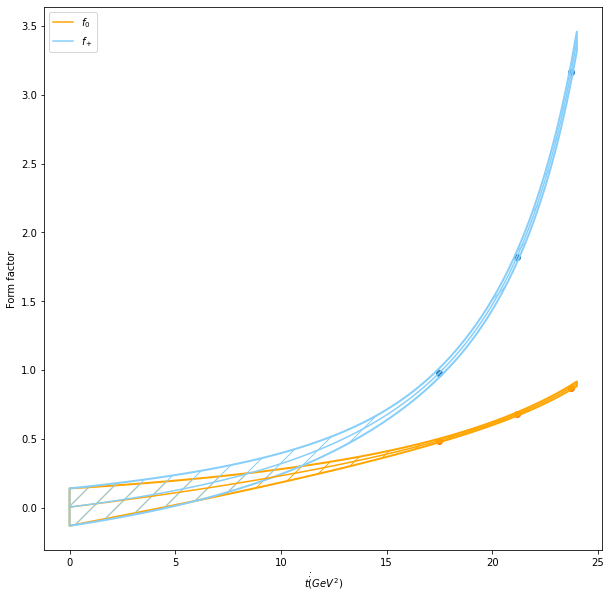

In [26]:
final = calcbounds(output)
tvals = final[0]
f0vals = final[1]
f0vars = final[2]
fplusvals = final[3]
fplusvars = final[4]

    
plt.scatter(dataplus[:,0],dataplus[:,1])
plt.scatter(datazero[:,0],datazero[:,1])
plt.plot(tvals,f0vals,label = r"$f_0$",color="orange")
plt.fill_between(tvals,f0vals-f0vars,f0vals+f0vars,linewidth=2,hatch='/',edgecolor="orange",facecolor="none")
plt.plot(tvals,fplusvals,label = r"$f_+$",color="lightskyblue")
plt.fill_between(tvals,fplusvals-fplusvars,fplusvals+fplusvars,linewidth=2,hatch='/',edgecolor="lightskyblue",facecolor="none")

plt.xlabel(r"$t \.\. (GeV^2)$")
plt.ylabel("Form factor")
plt.legend()
plt.rcParams["figure.figsize"] = (25,15)
plt.show()

In [27]:
final[:][0]

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  ])

In [28]:
for i in range(5):
    print(final[i][0])

0.0
0.006011479143191653
0.13562629881543806
0.006011473661613351
0.13562665270504004


In [29]:
returnsdatacheck = dispbounds([17.5,21.15623588,23.72835562],1000,N0=10)

100%|██████████| 1000/1000 [05:53<00:00,  2.83it/s]


In [30]:
calcbounds(returnsdatacheck)

[array([17.5       , 21.15623588, 23.72835562]),
 array([0.49073852, 0.68062627, 0.87563143]),
 array([0.01326492, 0.01222014, 0.01536583]),
 array([0.98398847, 1.82439002, 3.17116855]),
 array([0.0313344 , 0.04100632, 0.06543655])]

In [476]:
origincheck = dispbounds([0],1000,N0=10)

100%|██████████| 1000/1000 [02:02<00:00,  8.14it/s]


In [477]:
calcbounds(origincheck)

[array([0.]),
 array([0.00541637]),
 array([0.13355804]),
 array([0.00541637]),
 array([0.1335584])]